# COVID Data Report


In [1]:
import pandas as pd
import numpy as np
import dtale as dta
import datetime as dt
import matplotlib.pyplot as plt



In [2]:
import seaborn as sns


In [4]:
df_raw=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

#df=pd.concat([df_ytd,df_hist])

In [5]:
df_ytd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1138 entries, Province/State to 2/28/23
dtypes: float64(2), int64(1134), object(2)
memory usage: 2.5+ MB


## Data can be reformatted to see growth of country per day and total in a country

In [12]:
df_raw

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/18/23,2/19/23,2/20/23,2/21/23,2/22/23,2/23/23,2/24/23,2/25/23,2/26/23,2/27/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3596,3596,3596,3596,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1931,1931,1931,1931,1931,1931,1931,1931,1931,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4051,4051,4054,4055,4055,4055,4055,4055,4055,4055


In [78]:
#Store the column names of the raw dataframe in a variable

colnames = df_raw.columns
#Aggregate the raw dataframe by region

df = df_raw.pivot_table(index='Country/Region', values=colnames[4:])
#Transpose the dataframe so that countries become columns instead of rows

df = df.T
#Convert the index to a datetime object

df.index = pd.to_datetime(df.index)
#Sort the dataframe by dates

df.sort_index(inplace=True)

#Get the latest date from the index and store it as a string

latest_date = df.index[-1].strftime("%a %b %d, %Y")


print(latest_date)


Tue Feb 28, 2023


### We see that each day is  gives the month's result of cases. We must extract only the max value at the end of the month, then see how it progresses.


In [79]:
df['Australia'].resample('M').max().head()

2020-01-31     0.000
2020-02-29     0.000
2020-03-31     2.250
2020-04-30    11.625
2020-05-31    12.875
Freq: M, Name: Australia, dtype: float64

In [80]:
df['US'].resample('M').max().head()

2020-01-31         0.0
2020-02-29         1.0
2020-03-31      5359.0
2020-04-30     66638.0
2020-05-31    107857.0
Freq: M, Name: US, dtype: float64

# Analysis of COVID Progress 

### 1. Data Shows Total Progress of COVID

In [81]:
df_casesprogress=df.resample('M').max()

In [82]:
df_casesprogress=df_casesprogress[['United Kingdom', 'US','Korea, South','Brazil','Australia']]
#df_casesprogress[['France', 'Brazil', 'Korea, South', 'Iran', 'United Kingdom', 'US', 'Canada', 'Japan','Russia']]

# Unclean data illustration: The Current Fatalities Count from COVID by Month

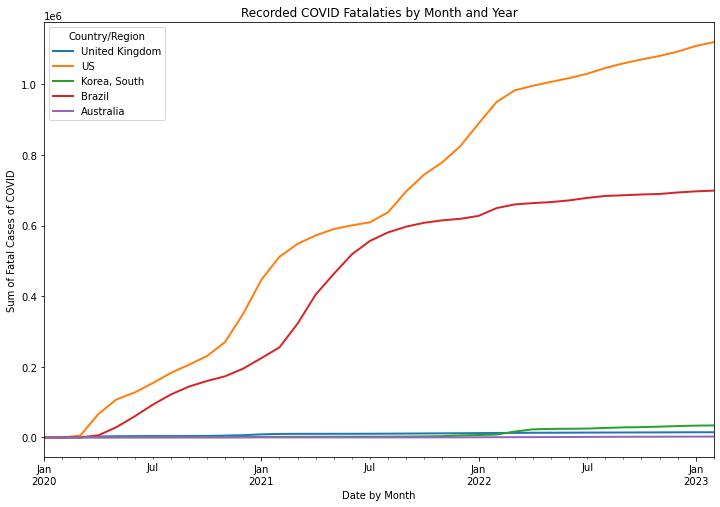

In [135]:
# Create a line plot of the counts over time
ax = df_casesprogress.plot(figsize=(12, 8), linewidth=2)
ax.set_xlabel('Date by Month')
ax.set_ylabel('Sum of Fatal Cases of COVID')
ax.set_title('Recorded COVID Fatalaties by Month and Year')
#ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))

plt.show()

## Conclusions:
* BIASED DATA: Some countries' datasets keep track of more cases on a National Scale
* Non-uniform Data: Different sources of data results in misalignment of metrics, IE Australia is using a 10^3 system rather than the US' raw count data.¶ 
* US and Brazil fatalities are high compared to other developed countries in raw numbers. However, it is not population averaged and metrics are not clearly kept for all countries.

In [136]:
df['US'].resample('M').max().tail()

2022-10-31    1070471.0
2022-11-30    1080557.0
2022-12-31    1092853.0
2023-01-31    1108756.0
2023-02-28    1119885.0
Freq: M, Name: US, dtype: float64

In [137]:
df[['Australia']].resample('M').max().tail()

Country/Region,Australia
2022-10-31,1958.125
2022-11-30,2017.125
2022-12-31,2131.500
2023-01-31,2326.875
2023-02-28,2421.625


## US COVID Progress

In [138]:
df_US_progress = df['US'].resample('M').max().diff()

In [139]:
counts = df_US_progress

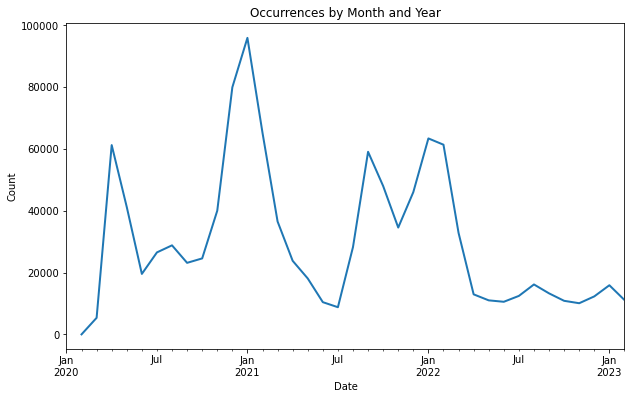

In [140]:
# Create a line plot of the counts over time
ax = counts.plot(figsize=(10, 6), linewidth=2)
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title('Occurrences by Month and Year')
#ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))

plt.show()


#### This is a basic graph, but it shows just how cases are slowly decreasing, perhaps not because of less cases but increased protection from natural and vaccinal immunity as well as naturalization of the disease as a seasonal phenomenon. 
#### We can also see the general decrease of peaks after 2021. However, cases probably will always remain due to COVID mutations, seasonality surges, and COVID being a global pandemic.

### 3. Modeling cases as time goes on

In [141]:
from statsmodels.tsa.arima.model import ARIMA

In [142]:
df_precvd_month=df_US_progress


/home/jeffwa/anaconda3/envs/DL_new/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

/home/jeffwa/anaconda3/envs/DL_new/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



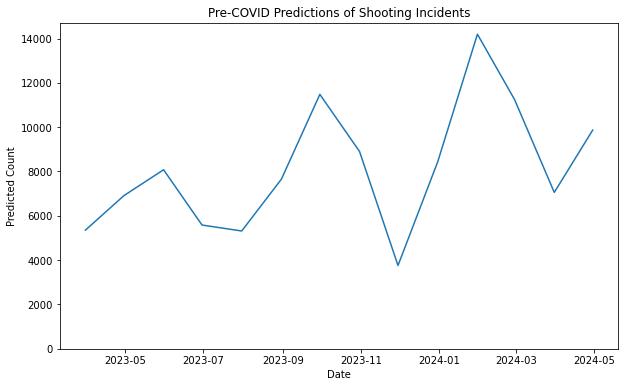

In [134]:
model = ARIMA(df_precvd_month, order=(14, 1,12))
model_fit = model.fit()
# Forecast future values of the time series
forecast = model_fit.forecast(steps=14)

# Plot the forecasted values
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(forecast)
ax.set_ylim(bottom=0)
ax.set_xlabel('Date')
ax.set_ylabel('Predicted Count')
ax.set_title('Pre-COVID Predictions of Shooting Incidents')
plt.show()


#### The model would predict normal behavior had it not been for lockdowns.

### 5. Bias
* BIASED DATA: Some countries' datasets keep track of more cases on a National Scale
* Non-uniform Data: Different sources of data results in misalignment of metrics, IE Australia is using a 10^3 system rather than the US' raw count data.¶ 
* US fatalities are high compared to other developed countries in raw numbers. However, this metric is not population averaged and metrics are not clearly kept for all countries. 

### 6. Conclusions 

<p style='text-align: left;'>
    
<b>   With the monthly progress graph, we can see the seasonality of the disease every start and end of the year, and a drop in the middle seasons. It also shows just how cases are slowly decreasing, perhaps not because of less cases but due to increased protection from natural and vaccinal immunity as well as naturalization of the disease as a seasonal phenomenon. We can also see the general decrease of peaks after 2021. However, cases probably will always remain due to COVID mutations, seasonality surges, and COVID being a global pandemic.<b>
    

</p>

<p style='text-align: left;'>
    
<b> 
    
Unfortunately, it is unlikely that fatalities will ever be zero. As the forecast suggests, the decay rate of these incidents have been slow and has been relatively flat. We expect cases to jump at the at the middle of summer due to seasonality and activities after the raining season going into spring.
    
</p>